In [1]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H4(n,m): # this is the definition in the published interpolations paper (2021):
    # def. 8.4
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()
    #if argument is an S type then 'polynomial' takes no argument.

def H4strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H4(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer


def H6(n,m):
    def base6(n,m):
        jay=J(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(jay-1))
        return L((-1)^m*(num/den)).O(n+1)
    return S(base6(n,m)^(1/(m-2))).polynomial()
     #if argument is an S type then 'polynomial' takes no argument.

def H6strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H6(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def deltaDagger(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return ((ddstep1(n,m)-ddstep2(n,m))/1728)

def deltaDagger2(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return (ddstep1(n,m)-ddstep2(n,m))

def deltaDaggerStrike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=deltaDagger(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [1..polydegree])
    return answer

# def deltaDaggerStrike(n,m):
 #   return S(((H4strike(n,3)^3-H6strike(n,3)^2)/1728)).truncate(n+1)
    
def deltaDaggerStrike2(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=deltaDagger2(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [1..polydegree])
    return answer



def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr



print("ok")

ok


In [3]:
print(deltaDagger(5,3))
print(deltaDaggerStrike2(5,3))

805/2567836929097728*x^5 - 23/139314069504*x^4 + 7/143327232*x^3 - 1/124416*x^2 + 1/1728*x
8346240*x^5 - 2543616*x^4 + 435456*x^3 - 41472*x^2 + 1728*x


In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
data=[]
import time
for m in [3..403]:
    start=time.time()
    poly=H4(100,m)
    data=data+[[m,poly]]
    finish=time.time()
    print([m,poly.degree(),finish-start])
import pickle
wfile = open('/Users/barrybrent/21mar12no15.txt','w') # H4 series (date typo)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
import pickle
rfile = open('/Users/barrybrent/21mar12no15.txt','r') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import pickle
import time
wfile = open('/Users/barrybrent/21mar21no19.txt','w') #H4 polynomials
for n in [0..100]:
    start=time.time()
    data=[]
    for k in [0..400]:
        m = s[k][0]
        poly=s[k][1]
        cf=polynomialCoefficient(n,poly)
        data=data+[[m,cf]]
        rl=R.lagrange_polynomial(data)
    polydata=polydata+[[n,rl]]
    finish=time.time()
    print([n,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [2]:
n=5
dds=deltaDagger(n,3)
cffs=dds.list()
data=[]
for k in [1..n]:
    data=data+[cffs[k]-rmnjntau(k)]
print(data)

[-1727/1728, 2985983/124416, -36118462457/143327232, 205070310309865/139314069504, -12402652367542025435/2567836929097728]


In [ ]:
# from notebook H6 from scratch 6sept22
data=[]
for m in [3..400]:
    if 10 in divisors(m):
        print m
    data=data+[[m,H6(100,m)]]
import pickle
wfile = open('/Users/barrybrent/8mar21no13.txt','a')
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [5]:
import pickle

rfile = open('/Users/barrybrent/21mar12no15.txt','rb') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
rfile2 = open('/Users/barrybrent/8mar21no13.txt','rb') #H6 series
rt=pickle.load(rfile2)
rfile2.close()
t=stripQuotationMarks(rt)
minn=min(len(s),len(t))
print(minn)



118


In [ ]:
import pickle

rfile = open('/Users/barrybrent/21mar12no15.txt','rb') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

rfile2 = open('/Users/barrybrent/8mar21no13.txt','rb') #H6 series
rt=pickle.load(rfile2)
rfile2.close()
t=stripQuotationMarks(rt)


import time
wfile = open('/Users/barrybrent/9sept22no9.txt','wb') # deltaDagger series
data=[]
minn=min(len(s),len(t))
print("minn: ",minn-1)
start = time.time()
for n in [0..minn-1]:
    start = time.time()
    m=s[n][0]
    h6squared=t[n][1]^2
    h4cubed=s[n][1]^3
    dagger=D(((h4cubed-h6squared))).truncate(100)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,dagger.degree(),finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [3]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no9.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=100
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
dfeg=drop_first_element(g(0))
print(len(dfeg))
print(dfeg)

99
[1728, -41472, 435456, -2543616, 8346240, -10450944, -28933632, 145981440, -196375104, -200309760, 923809536, -640991232, -998331264, 694407168, 2103252480, 1705771008, -11933453952, 4713002496, 18422933760, -12285665280, -7291275264, -22171428864, 32215574016, 36787322880, -44062660800, 23959950336, -126626250240, 42590306304, 221886656640, -50478059520, -91312994304, -339908493312, 232800003072, 286402894848, -139749442560, 289064153088, -314864606592, -442150410240, -251579478528, 705090355200, 532432123776, 174990606336, -29593223424, -1359847636992, -948491752320, -773173776384, 4643738201088, 429854294016, -2932355877696, 1057503859200, -3007230395904, 1469543620608, -2757984246144, 3039030005760, 4462000058880, -2444313231360, 4642579307520, -5325279759360, -8966944062720, -3095987650560, 12020795127936, 2191511863296, 3288104741376, 4664384815104, -4821940005120, -5587200073728, -26752596855552, 17566044217344, 8118324652032, 3353986621440, 16919686550016, -16589768785920, 2

In [4]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no9.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=99
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
dfeg=drop_first_element(g(0))
fs=factorSeriesFromLists(dfeg,bound-1)
print([m(0),fs])
print(len(fs))

[3, [41472, 859507200, 23758211160576, 738788283004188672, 24505015633549598965248, 846678897315120085023320064, 30089636658922891184109786935808, 1091616255478572625888623023202172800, 40231152078738402642267886644003903507456, 1501239478001275633851708337167848059002243840, 56585126223555939185176953612259912435084640229888, 2150595465476303331542013633160380750306509419193470080, 82307918173351677772060411414794994690880080203993030231552, 3168851819930987154210125155267678920897135598207375156232586240, 122626322927076995589474532114350957626311768317095419327599041742336, 4766504196900241365086457924772253690031899440512868996139082187355000160, 186001325304485964669495948934929695912890223320506587882081979586446025869312, 7283455189121597832343340981462222301632247291522035654450702059809296382985135872, 286089128270882406477082519437356994831366539569211338914440964697773737852015221099008, 1126859985154771273897676961067409092410696368775039800890487064539044295357330097081609

In [5]:
import pickle
rfile = open('/Users/barrybrent/9sept22no9.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

118


In [6]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no9.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=99
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
import time
start=time.time()
for index in [0..117]:
    
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
    print([m(index),time.time()-start])

wfile = open('/Users/barrybrent/9sept22no10.txt','wb') #dagger Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 0.020138978958129883]
[4, 0.04020810127258301]
[5, 0.07023882865905762]
[6, 0.09099411964416504]
[7, 0.11991214752197266]
[8, 0.1514270305633545]
[9, 0.18247604370117188]
[10, 0.21044611930847168]
[11, 0.24131298065185547]
[12, 0.2691800594329834]
[13, 0.30402088165283203]
[14, 0.3356058597564697]
[15, 0.3641829490661621]
[16, 0.39460015296936035]
[17, 0.4302031993865967]
[18, 0.4611802101135254]
[19, 0.4930448532104492]
[20, 0.5240130424499512]
[21, 0.5540132522583008]
[22, 0.58685302734375]
[23, 0.6209759712219238]
[24, 0.6522858142852783]
[25, 0.6838009357452393]
[26, 0.7178239822387695]
[27, 0.7499382495880127]
[28, 0.7831201553344727]
[29, 0.81591796875]
[30, 0.8451700210571289]
[31, 0.8761279582977295]
[32, 0.912437915802002]
[33, 0.9440939426422119]
[34, 0.9801599979400635]
[35, 1.014988899230957]
[36, 1.0487840175628662]
[37, 1.0845119953155518]
[38, 1.1186511516571045]
[39, 1.1506640911102295]
[40, 1.1831212043762207]
[41, 1.2184100151062012]
[42, 1.2496402263641357]
[43, 

In [7]:
import pickle
rfile = open('/Users/barrybrent/9sept22no10.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))
print(s[0])

118
[3, [41472, 859507200, 23758211160576, 738788283004188672, 24505015633549598965248, 846678897315120085023320064, 30089636658922891184109786935808, 1091616255478572625888623023202172800, 40231152078738402642267886644003903507456, 1501239478001275633851708337167848059002243840, 56585126223555939185176953612259912435084640229888, 2150595465476303331542013633160380750306509419193470080, 82307918173351677772060411414794994690880080203993030231552, 3168851819930987154210125155267678920897135598207375156232586240, 122626322927076995589474532114350957626311768317095419327599041742336, 4766504196900241365086457924772253690031899440512868996139082187355000160, 186001325304485964669495948934929695912890223320506587882081979586446025869312, 7283455189121597832343340981462222301632247291522035654450702059809296382985135872, 286089128270882406477082519437356994831366539569211338914440964697773737852015221099008, 112685998515477127389767696106740909241069636877503980089048706453904429535733009708

In [2]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/9sept22no10.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/9sept22no11.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [0..19]:  #any more and the degrees become constant
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1])
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 6, 0.0430912971496582]
[1, 12, 0.08512210845947266]
[2, 18, 0.12698602676391602]
[3, 24, 0.1692981719970703]
[4, 30, 0.25400424003601074]
[5, 36, 0.30034828186035156]
[6, 42, 0.3480722904205322]
[7, 48, 0.3937652111053467]
[8, 54, 0.4394569396972656]
[9, 60, 0.48534321784973145]
[10, 66, 0.5322332382202148]
[11, 72, 0.5798273086547852]
[12, 78, 0.6262509822845459]
[13, 84, 0.6731300354003906]
[14, 90, 0.7202601432800293]
[15, 96, 0.7678101062774658]
[16, 102, 0.8163440227508545]
[17, 108, 0.8675529956817627]
[18, 114, 0.9167211055755615]
[19, 117, 1.0017261505126953]


exponent:  0


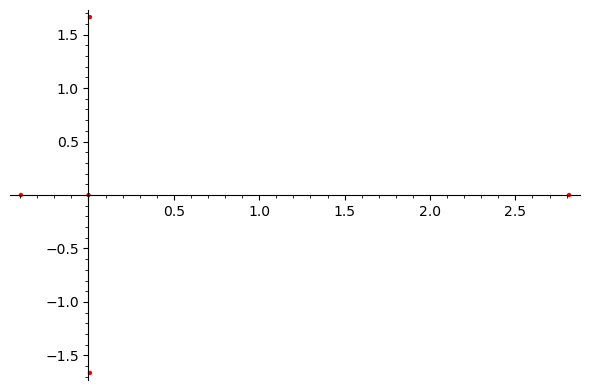

exponent:  1


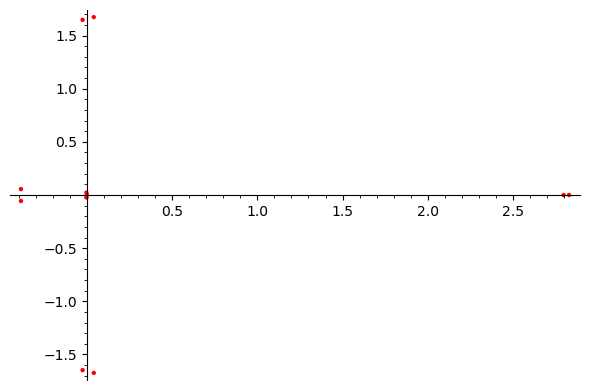

exponent:  2


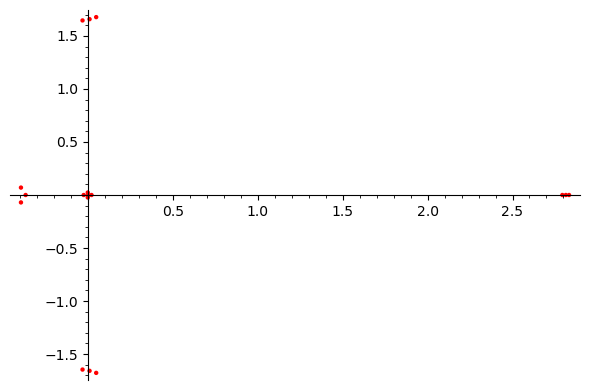

exponent:  3


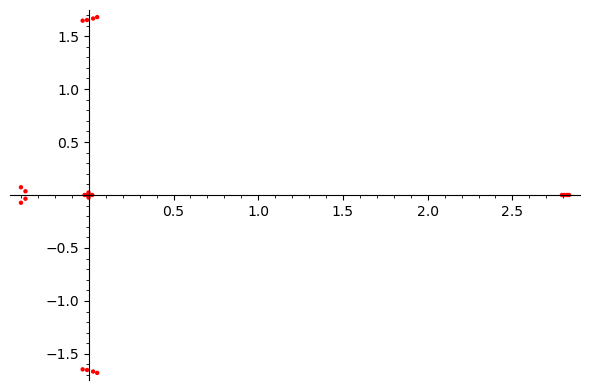

exponent:  4


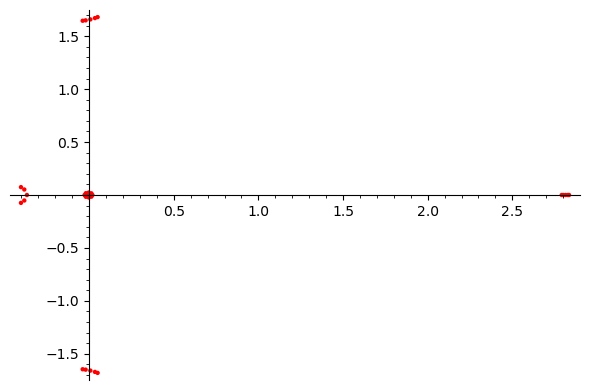

exponent:  5


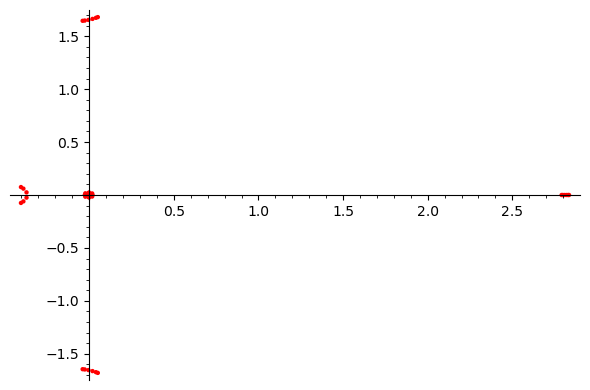

exponent:  6


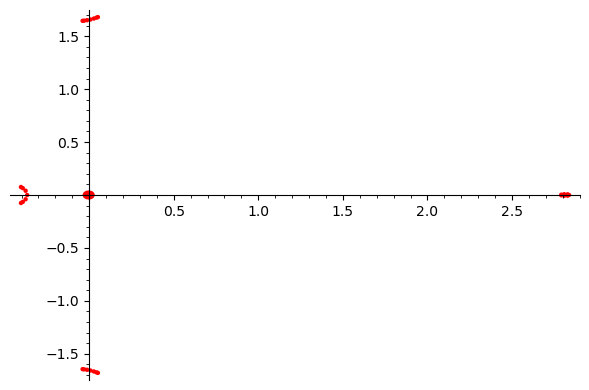

exponent:  7


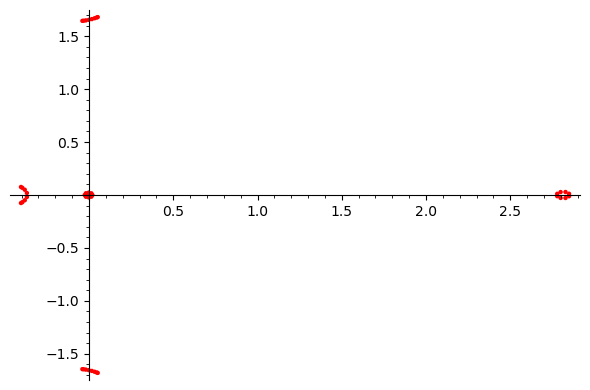

exponent:  8


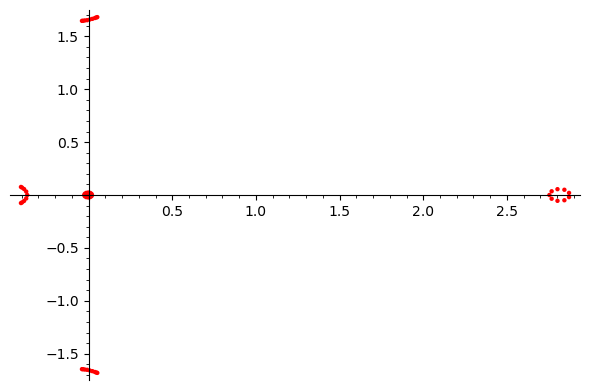

exponent:  9


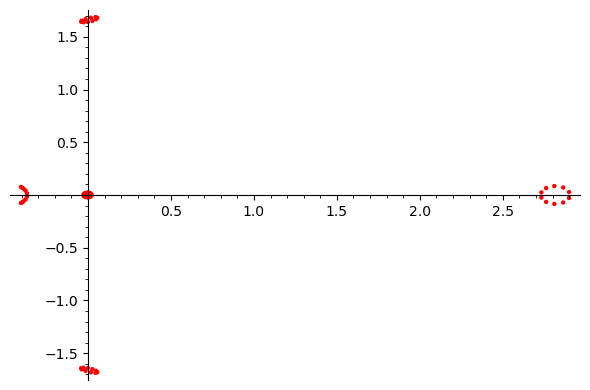

exponent:  10


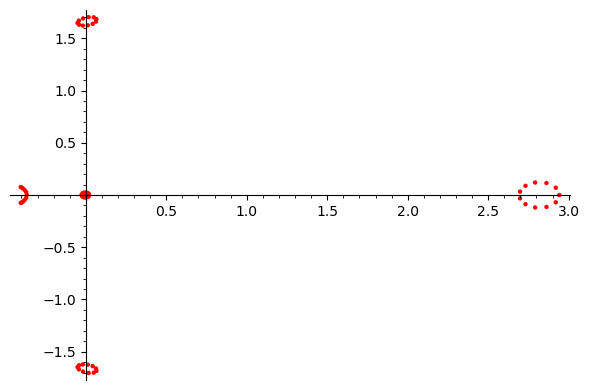

exponent:  11


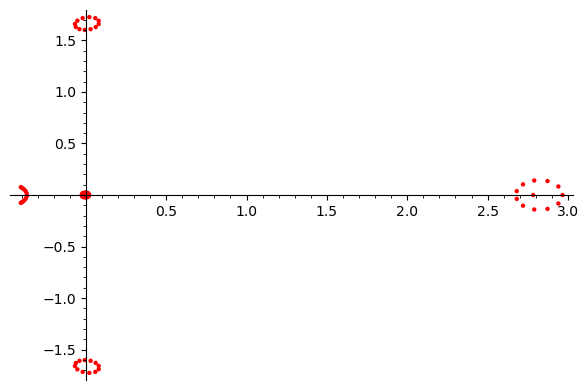

exponent:  12


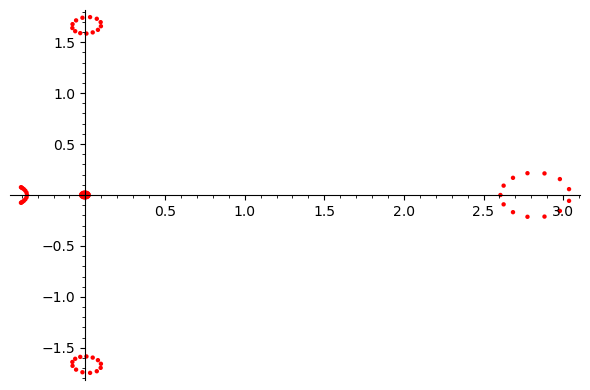

exponent:  13


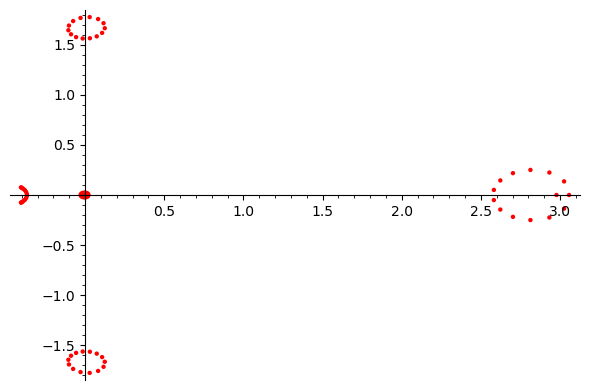

exponent:  14


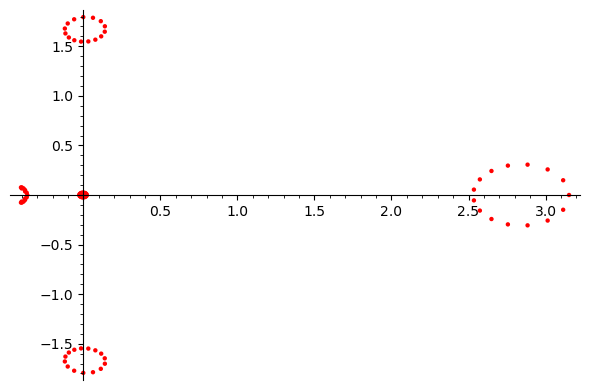

exponent:  15


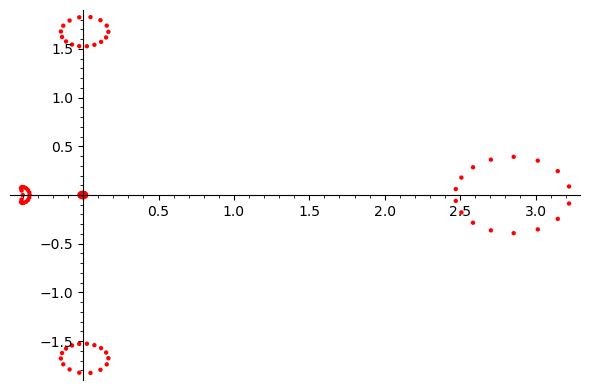

exponent:  16


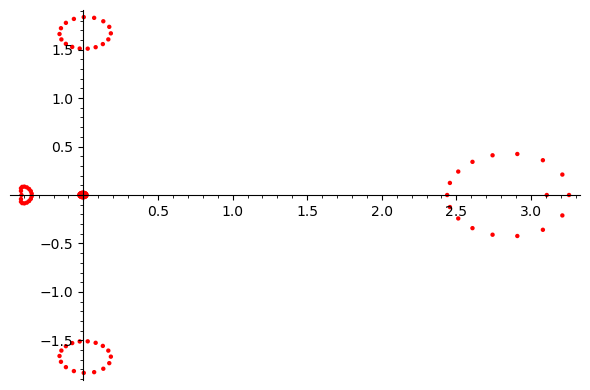

exponent:  17


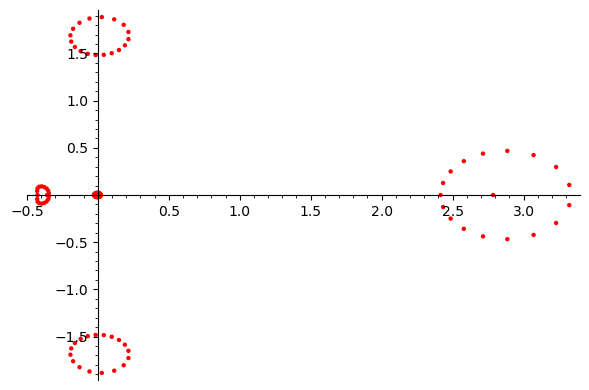

exponent:  18


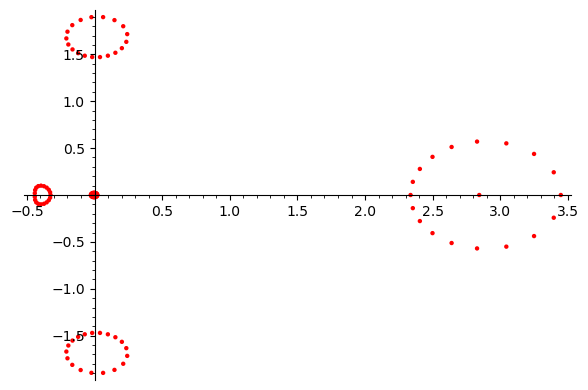

exponent:  19


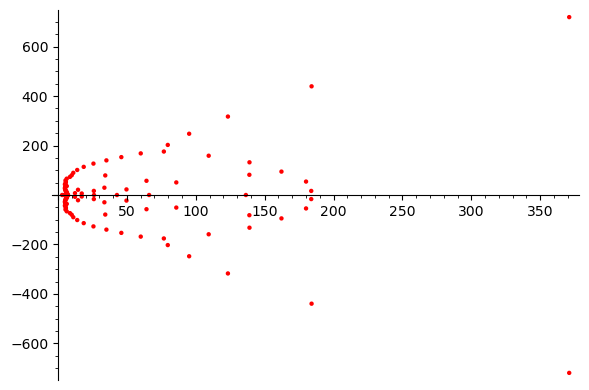

In [3]:
import pickle
rfile = open('/Users/barrybrent/9sept22no11.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lnth=len(s)
for k in [0..lnth-1]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=10)
    show(rootplot)